In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import torch

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
train_path = '/content/drive/MyDrive/AgrilPlant_Dataset_2017/train'
test_path='/content/drive/MyDrive/AgrilPlant_Dataset_2017/test'

In [12]:
datagen= ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(train_path, target_size=(224, 224),
                                              batch_size=32, class_mode='categorical')
validation_generator = datagen.flow_from_directory(train_path, target_size=(224, 224),
                                              batch_size=32, class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
   target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 720 images belonging to 3 classes.
Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [40]:
print("Number of images per class in the train_generator:")
for classe, indice in train_generator.class_indices.items():
    num_images = len(os.listdir(os.path.join(train_path, classe)))
    print(f"Class '{classe}': {num_images} images")

print("\nNumber of images per class in the test generator:")
for classe, indice in test_generator.class_indices.items():
    num_images = len(os.listdir(os.path.join(test_path, classe)))
    print(f"Class '{classe}': {num_images} images")


Number of images per class in the train_generator:
Class 'apple': 240 images
Class 'papaya': 240 images
Class 'pineapple': 240 images

Number of images per class in the test generator:
Class 'apple': 60 images
Class 'papaya': 60 images
Class 'pineapple': 60 images


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),


    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),


    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Adding dropout for regularization
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(3, activation='softmax')  # 15 classes in your dataset
])


In [15]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 256)       2

In [17]:
history = model.fit(
    train_generator,
    batch_size=128,
    epochs=20,
    steps_per_epoch=len(train_generator),
)


Epoch 1/20
23/23 [==============================] - 128s 5s/step - loss: 1.4805 - accuracy: 0.3347
Epoch 2/20
23/23 [==============================] - 5s 209ms/step - loss: 1.0990 - accuracy: 0.2958
Epoch 3/20
23/23 [==============================] - 5s 208ms/step - loss: 1.0994 - accuracy: 0.3500
Epoch 4/20
23/23 [==============================] - 5s 213ms/step - loss: 1.0257 - accuracy: 0.4764
Epoch 5/20
23/23 [==============================] - 5s 215ms/step - loss: 1.0985 - accuracy: 0.3472
Epoch 6/20
23/23 [==============================] - 5s 210ms/step - loss: 0.9977 - accuracy: 0.4514
Epoch 7/20
23/23 [==============================] - 5s 212ms/step - loss: 0.8898 - accuracy: 0.5569
Epoch 8/20
23/23 [==============================] - 5s 219ms/step - loss: 0.9165 - accuracy: 0.6208
Epoch 9/20
23/23 [==============================] - 5s 210ms/step - loss: 0.7118 - accuracy: 0.6583
Epoch 10/20
23/23 [==============================] - 5s 211ms/step - loss: 0.6787 - accuracy: 0.7208


In [36]:

test_results = model.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size)

print(f'Loss on the test dataset: {test_results[0]}')
print(f'Accuracy on the test dataset: {test_results[1] * 100:.2f}%')


22/22 [==============================] - 3s 128ms/step - loss: 0.2876 - accuracy: 0.8835
Loss on the test dataset: 0.28758278489112854
Accuracy on the test dataset: 88.35%


In [28]:
from PIL import Image
import IPython.display as display
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [29]:
upload_dir = '/content/drive/MyDrive/AgrilPlant_Dataset_2017/test/pineapple/'
image_name = input("Enter the path to the image: ")
img_path = upload_dir + image_name

Enter the path to the image: pineapple_113.jpg


In [30]:
img = Image.open(img_path)
img = img.resize((224, 224))
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)

Chemin de l'image: /content/drive/MyDrive/AgrilPlant_Dataset_2017/test/pineapple/pineapple_113.jpg


1/1 [==============================] - 0s 26ms/step


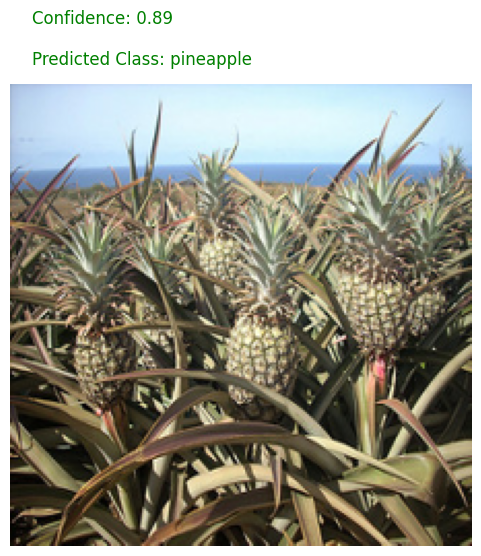

pineapple


In [31]:

predictions = model.predict(img)


predicted_class = np.argmax(predictions)
confidence_score = np.max(predictions)


class_names = ["apple","papaya" , "pineapple"]


if predicted_class < len(class_names):
    predicted_class_name = class_names[predicted_class]
else:
    predicted_class_name = "Unknown Class"


plt.figure(figsize=(6, 6))
plt.imshow(img[0])
plt.axis('off')


plt.text(10, -10, f"Predicted Class: {predicted_class_name}", fontsize=12, color='green')
plt.text(10, -30, f"Confidence: {confidence_score:.2f}", fontsize=12, color='green')

plt.show()
print(predicted_class_name)

In [32]:
location = input("Enter your city: ")

Enter your city: paris


In [33]:
import requests

api_key = "9e8499e3e3f81358e338048ebd0c0777"
city= "paris"

url = f"http://api.weatherstack.com/current?access_key={api_key}&query={location}"
response = requests.get(url)
print(response.text)
if response.status_code == 200:
    data = response.json()
else:
    print(f"Error. Code : {response.status_code}")

temperature = data["current"]["temperature"]

print(temperature)

{"request":{"type":"City","query":"Paris, France","language":"en","unit":"m"},"location":{"name":"Paris","country":"France","region":"Ile-de-France","lat":"48.867","lon":"2.333","timezone_id":"Europe\/Paris","localtime":"2023-12-05 03:30","localtime_epoch":1701747000,"utc_offset":"1.0"},"current":{"observation_time":"02:30 AM","temperature":8,"weather_code":296,"weather_icons":["https:\/\/cdn.worldweatheronline.com\/images\/wsymbols01_png_64\/wsymbol_0033_cloudy_with_light_rain_night.png"],"weather_descriptions":["Light Rain"],"wind_speed":30,"wind_degree":230,"wind_dir":"SW","pressure":1000,"precip":0.3,"humidity":81,"cloudcover":75,"feelslike":4,"uv_index":1,"visibility":10,"is_day":"no"}}
8


In [34]:

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [35]:
worksheet = gc.open('water').sheet1


rows = worksheet.get_all_values()
print(rows)

import pandas as pd
df=pd.DataFrame.from_records(rows)


filtered_df_stat = df[df[0] == predicted_class_name][[3]]
values_array_stat = filtered_df_stat.values


stat1 = values_array_stat[0]
stat2 = values_array_stat[1]
stat3 = values_array_stat[2]



filtered_df_temp_inf = df[df[0] == predicted_class_name][[1]]

values_array_temp_inf = filtered_df_temp_inf.values


temp_inf = values_array_temp_inf[0]


filtered_df_temp_sup = df[df[0] == 'papaya'][[2]]
values_array_temp_sup = filtered_df_temp_sup.values

temp_sup = values_array_temp_sup[0]


temp_inf = int(temp_inf)
temp_sup = int(temp_sup)

if temperature < temp_inf:
  bool= '-1'
elif temperature >temp_sup:
  bool=1
else:
  bool=0

filtered_df_stathh = df[(df[0] == predicted_class_name) & (df[3] == '-1')][[4]]

unique_values = filtered_df_stathh.values.flatten()

print(unique_values)

[['plant', 'temperature_inf', 'temperature_sup', 'status', 'action(mm)'], ['apple', '18', '24', '1', '40'], ['apple', '18', '24', '0', '32'], ['apple', '18', '24', '-1', '25'], ['papaya', '22', '27', '1', '5,00E+01'], ['papaya', '22', '27', '0', '3,50E+01'], ['papaya', '22', '27', '-1', '2,50E+01'], ['pineapple', '20', '36', '1', '7'], ['pineapple', '20', '36', '0', '5'], ['pineapple', '20', '36', '-1', '3']]
['3']
